Aakash Chaudhary (1943805)

CSC 478: Programming Machine Learning Applications 

Assignment -- 3

For this problem you will use a different subset of the 20 Newsgroup data set(see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module. You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]


a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.
b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.
c. As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]
d. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]
e. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.
f. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [4]:
def cosineSim(x, d):
    norm_x = np.linalg.norm(x)
    norm_d = np.linalg.norm(d)
    sim = np.dot(d, x)/(norm_d * norm_x)
    dist = 1 - sim
    return dist

In [5]:
matrix = pd.DataFrame(np.genfromtxt("/Users/macbook/Downloads/newsgroups5/matrix.txt", delimiter=',', dtype=int).T)
classes = pd.DataFrame(np.genfromtxt("/Users/macbook/Downloads/newsgroups5/classes.txt", delimiter=' ', dtype=int, skip_header=1))
terms = np.array(pd.DataFrame(np.genfromtxt("/Users/macbook/Downloads/newsgroups5/terms.txt", delimiter='\t', dtype=str)))

In [6]:
matrix.shape

(2500, 9328)

In [7]:
terms.shape

(9328, 1)

In [9]:
classes = classes.drop(classes.columns[0], axis=1)
classes.head()

,1
0,0
1,1
2,1
3,1
4,2


In [10]:
classes.shape

(2500, 1)

In [12]:
from sklearn.model_selection import train_test_split
matrix_train, matrix_test, classes_train, classes_test = train_test_split(matrix, classes, test_size=0.2, random_state=33)

In [13]:
matrix_train.shape

(2000, 9328)

In [14]:
matrix_test.shape

(500, 9328)

In [26]:
dt = matrix_train
td = matrix_train.T

dt_test = matrix_test
td_test = matrix_test.T

df = np.array([(td!=0).sum(1)]).T

matrix_doc_number = dt.shape[0]
matrix_term_number = dt.shape[1]
term_freq = matrix_train.sum(axis = 1)

newMatrix = np.ones(np.shape(td), dtype = float) * matrix_doc_number

idf = np.log2(np.divide(newMatrix, df))

td_tfidf_train = np.array(td * idf)
td_tfidf_test = np.array(td_test * idf[:, :500])
dt_tfidf_train = td_tfidf_train.T
dt_tfidf_test = td_tfidf_test.T

dt_tfidf_train[np.isnan(dt_tfidf_train)] = 0
dt_tfidf_test[np.isnan(dt_tfidf_test)] = 0

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [27]:
from numpy import *

def distEuclid(va, vb):
    return sqrt(sum(power(va - vb, 2)))

def randomCent(ds, k):
    n = shape(ds)[1]
    centroid = zeros((k,n), dtype = float)
    for j in range(n):
        j_min = min(ds[:, j])
        j_range = float(max(ds[:, j]) - j_min)
        centroid[:, j] = j_min + j_range * random.rand(k)    
    return centroid

def kMeans(ds, k, distMeas = cosineSim, createCent = randomCent):
    m = shape(ds)[0]
    centroid = createCent(ds, k)
    clusterassment = zeros((m, 2))
    c_changed = True
    while c_changed:
        c_changed = False
        for i in range(m):
            min_dist = inf 
            min_index = -1
            for j in range(k):
                ji_dist = distMeas(cent[j, :],ds[i, :])
                if ji_dist < min_dist:
                    min_dist = ji_dist 
                    min_index = j
            if clusterassment[i,0] != min_index: 
                clusterchanged = True
            clusterassment[i, :] = min_index, min_dist ** 2
        for c in range(k):
            pts = ds[nonzero(c_assment[:, 0] == c)[0]]
            if(len(pts)!=0):
                cent[c,:] = mean(pts, axis=0)
    return centroid, clusterassment

In [28]:
def top_terms(data, K, numterms):
    centroid, clusterassment = kMeans(mat(data), K, distMeas = cosineSim)
    for i in range(K):
        print('Cluster', i+1, ': ')
        c_matrix = data[clusterassment[:, 0] == i]
        print('Number of items in Cluster ',i+1 ,': ', c_matrix.shape[0])
        c_freq = np.array([(c_matrix.T != 0).sum(1)]).T
        
        mc = c_freq / float(c_matrix.shape[0])
        mc = map(list, mc)
        mc = [m[0] for m in mc]
        c_freq = [m[0] for m in c_freq]
        n = sorted(zip(terms, c_freq, mc),key = lambda x:x[2], reverse = True)
        for m in n[:numterms]:
            print('Term: ',m[0])
            print('Frequency: ',m[1])
            print('Percent of docs contain term ', m[0], ': ', m[2] * 100,'\n')
        print('\n')
    return centroid, clusterassment

centroid, clusterassment = top_terms(dt_tfidf_train, 5, 10)

Cluster 1 : 
Number of items in Cluster  1 :  450
Term:  ['sale']
Frequency:  228
Percent of docs contain term  ['sale'] :  50.66666666666667 

Term:  ['email']
Frequency:  156
Percent of docs contain term  ['email'] :  34.66666666666667 

Term:  ['pleas']
Frequency:  143
Percent of docs contain term  ['pleas'] :  31.77777777777778 

Term:  ['thank']
Frequency:  113
Percent of docs contain term  ['thank'] :  25.11111111111111 

Term:  ['offer']
Frequency:  107
Percent of docs contain term  ['offer'] :  23.77777777777778 

Term:  ['includ']
Frequency:  101
Percent of docs contain term  ['includ'] :  22.444444444444443 

Term:  ['on']
Frequency:  101
Percent of docs contain term  ['on'] :  22.444444444444443 

Term:  ['ship']
Frequency:  101
Percent of docs contain term  ['ship'] :  22.444444444444443 

Term:  ['card']
Frequency:  98
Percent of docs contain term  ['card'] :  21.777777777777775 

Term:  ['interest']
Frequency:  90
Percent of docs contain term  ['interest'] :  20.0 



Clu

In [29]:
from sklearn.metrics import completeness_score, homogeneity_score

cs = completeness_score(np.array(classes_train.T)[0],clusterassment[:,0])
hs = homogeneity_score(np.array(classes_train.T)[0],clusterassment[:,0])

print('Completeness score: %0.8f' % cs)
print('Homogeneity of Clusters: %0.8f' % hs)

Completeness score: 0.73676170
Homogeneity of Clusters: 0.50914883


In [30]:
results = []
for d in dt_tfidf_test:  
    dic = {}
    sim = []
    c = 0
    for centroid in cent:
        c += 1
        cmatrix_sim = 1 - cosineSim(d, centroid)
        sim.append(cmatrix_sim) 
        dic['Cosine Similarity' + str(c)] = cmatrix_sim
    dic['Predicted Cluster'] = sim.index(max(sim)) + 1
    results.append(dic)
test_cluster = pd.DataFrame(results)

In [31]:
test_cluster.head()

,Cosine Similarity1,Cosine Similarity2,Cosine Similarity3,Cosine Similarity4,Cosine Similarity5,Predicted Cluster
0,0.031064,0.089605,0.000840,0.041898,0.000003,2
1,0.059637,0.123926,0.002391,0.109176,0.000009,2
2,0.069125,0.015905,0.026123,0.015587,0.000014,1
3,0.105845,0.102500,0.003816,0.190079,0.000008,4
4,0.154182,0.064873,0.003985,0.033840,0.000030,1


In [32]:
test_cluster.to_csv("/Users/macbook/Downloads/newsgroups5/Homework5.csv")

In [33]:
t_list = list(terms.T[0])

p1 = pd.DataFrame(dt_tfidf_train[clusterassment[:,0] == 0])
p1.columns = terms.T[0]
p1_freq = list(np.array((p1.T != 0).sum(1).T))
p1_words = ""
f = 0
for i in p1_freq:
    for j in range(i):
        p1_words += t_list[f] + " "
    f += 1

p2 = pd.DataFrame(dt_tfidf_train[clusterassment[:,0] == 1])
p2.columns = terms.T[0]
p2_freq = list(np.array((p2.T != 0).sum(1).T))
p2_words = ""
f = 0
for i in p2_freq:
    for j in range(i):
        p2_words += t_list[f] + " "
    f += 1

p3 = pd.DataFrame(dt_tfidf_train[clusterassment[:,0] == 2])
p3.columns = terms.T[0]
p3_freq = list(np.array((p3.T != 0).sum(1).T))
p3_words = ""
f = 0
for i in p3_freq:
    for j in range(i):
        p3_words += t_list[f] + " "
    f += 1

p4 = pd.DataFrame(dt_tfidf_train[clusterassment[:,0] == 3])
p4.columns = terms.T[0]
p4_freq = list(np.array((p4.T != 0).sum(1).T))
p4_words = ""
f = 0
for i in p4_freq:
    for j in range(i):
        p4_words += t_list[f] + " "
    f += 1

p5 = pd.DataFrame(dt_tfidf_train[clusterassment[:,0] == 4])
p5.columns = terms.T[0]
p5_freq = list(np.array((p5.T != 0).sum(1).T))
p5_words = ""
f = 0
for i in p5_freq:
    for j in range(i):
        p5_words += t_list[f] + " "
    f += 1

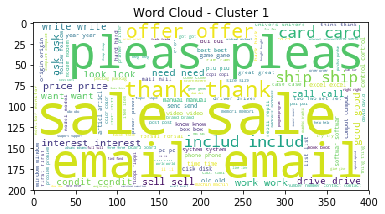

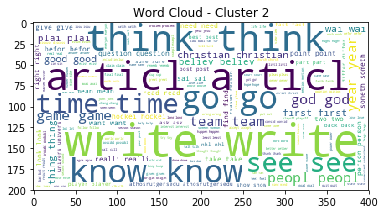

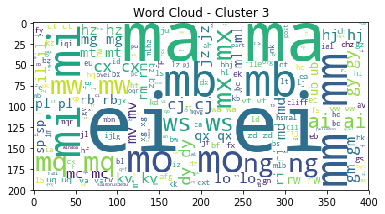

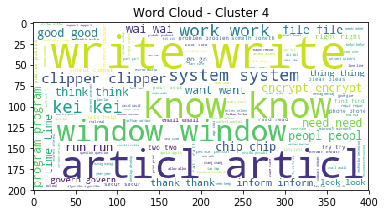

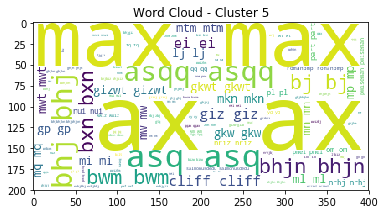

In [34]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

p1_wc = WordCloud(background_color = 'white').generate(p1_words)
plt.imshow(p1_wc)
plt.title('Word Cloud - Cluster 1')
plt.show()

p2_wc = WordCloud(background_color = 'white').generate(p2_words)
plt.imshow(p2_wc)
plt.title('Word Cloud - Cluster 2')
plt.show()

p3_wc = WordCloud(background_color = 'white').generate(p3_words)
plt.imshow(p3_wc)
plt.title('Word Cloud - Cluster 3')
plt.show()

p4_wc = WordCloud(background_color = 'white').generate(p4_words)
plt.imshow(p4_wc)
plt.title('Word Cloud - Cluster 4')
plt.show()

p5_wc = WordCloud(background_color = 'white').generate(p5_words)
plt.imshow(p5_wc)
plt.title('Word Cloud - Cluster 5')
plt.show()